# Train Test Splits, Cross Validation, and Linear Regression

![Lregressions.png](Assets/LinearRegr.png)

# Learning Objectives

- Explain the difference between over-fitting and under-fitting a model
- Describe Bias-variance tradeoffs
- Find the optimal training and test data set splits, cross-validation, and model complexity versus error
- Apply a linear regression model for supervised learning
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars.


### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>

          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>

          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>

          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>

          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>

          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>

          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>

          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>

          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>
          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>

          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>
          
        </ul>
      </td>
      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>
          
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>

          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>

          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>

          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>
          
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>
          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>
          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>
          
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>
          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>
          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>


In [ ]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [ ]:
!pip install scikit-learn-intelex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 9.2 MB/s eta 0:00:00


## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`).
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Ames_Housing_Sales (1).csv")  # Update with the correct path

# Display the shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)

# Display data types of each column
data_types = df.dtypes.value_counts()
print("\nCount of Each Data Type:")
print(data_types)


Dataset Shape: (1379, 80)

Count of Each Data Type:
object     43
float64    21
int64      16
Name: count, dtype: int64


In [ ]:
#Display value counts of data set


## Question 2

As discussed in the lecture, a significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Ames_Housing_Sales (1).csv")  # Update the path as needed

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column (n-1 for one-hot encoding)
additional_features = sum(df[col].nunique() - 1 for col in categorical_cols)

# Calculate new total feature count
current_features = df.shape[1]  # Including target column
new_features = current_features - len(categorical_cols) + additional_features

# Display results
print(f"Current total features: {current_features}")
print(f"Estimated new total features after one-hot encoding: {new_features}")


Current total features: 80
Estimated new total features after one-hot encoding: 241


In [ ]:
# Determine how many extra columns would be created


# No need to encode if there is only one value

# Number of one-hot columns is one less than the number of categories

# This is 215 columns, assuming the original ones are dropped.
# This is quite a few extra columns!


## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/Ames_Housing_Sales (1).csv")  # Update with correct path

# Create a separate copy of the dataframe
df_encoded = df.copy()

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Display shape after encoding
print(f"New dataset shape after one-hot encoding: {df_encoded.shape}")

# Save the transformed dataset
df_encoded.to_csv("/content/Ames_Housing_Sales (1).csv", index=False)


New dataset shape after one-hot encoding: (1379, 241)


In [ ]:
# Column difference is as calculated above


In [ ]:

# Remove the string columns from the dataframe


#print shape of data

## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data.
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the original dataset (before encoding)
df_original = pd.read_csv("/content/Ames_Housing_Sales (1).csv")  # Update with correct path

# Load the one-hot encoded dataset
df_encoded = pd.read_csv("/content/Ames_Housing_Sales (1).csv")

# Separate features (X) and target variable (y) for both datasets
X_original = df_original.drop(columns=['SalePrice'])  # Drop target column
y_original = df_original['SalePrice']  # Target variable

X_encoded = df_encoded.drop(columns=['SalePrice'])
y_encoded = df_encoded['SalePrice']

# Split data into training and testing sets (use the same random_state for consistency)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initialize and train Linear Regression models
model_orig = LinearRegression()
model_enc = LinearRegression()

model_orig.fit(X_train_orig, y_train_orig)
model_enc.fit(X_train_enc, y_train_enc)

# Predict on train and test sets
y_train_pred_orig = model_orig.predict(X_train_orig)
y_test_pred_orig = model_orig.predict(X_test_orig)

y_train_pred_enc = model_enc.predict(X_train_enc)
y_test_pred_enc = model_enc.predict(X_test_enc)

# Calculate Mean Squared Error (MSE)
mse_train_orig = mean_squared_error(y_train_orig, y_train_pred_orig)
mse_test_orig = mean_squared_error(y_test_orig, y_test_pred_orig)

mse_train_enc = mean_squared_error(y_train_enc, y_train_pred_enc)
mse_test_enc = mean_squared_error(y_test_enc, y_test_pred_enc)

# Print MSE results
print("Original Data - Train MSE:", mse_train_orig)
print("Original Data - Test MSE:", mse_test_orig)
print("\nOne-Hot Encoded Data - Train MSE:", mse_train_enc)
print("One-Hot Encoded Data - Test MSE:", mse_test_enc)

# Compare which model performs better on the test data
if mse_test_enc < mse_test_orig:
    print("\n✅ One-hot encoded model has a smaller test error and generalizes better!")
else:
    print("\n✅ Original model has a smaller test error.")


Original Data - Train MSE: 358966765.9112954
Original Data - Test MSE: 3575081814.633922

One-Hot Encoded Data - Train MSE: 358966765.9112954
One-Hot Encoded Data - Test MSE: 3575081814.633922

✅ Original model has a smaller test error.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values


# Data that have not been one-hot encoded

# Data that have been one-hot encoded

# Assemble the results


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load datasets
df_original = pd.read_csv("/content/Ames_Housing_Sales (1).csv")  # Update with correct path
df_encoded = pd.read_csv("/content/Ames_Housing_Sales (1).csv")

# Separate features (X) and target variable (y)
X_original = df_original.drop(columns=['SalePrice'])
y_original = df_original['SalePrice']

X_encoded = df_encoded.drop(columns=['SalePrice'])
y_encoded = df_encoded['SalePrice']

# Split datasets into training and testing (same split for both)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Check skewness before scaling
skew_values = X_train_orig.skew().sort_values(ascending=False)
print("\nFeature Skewness Before Scaling:\n", skew_values)

# Decide on scaling method (choose one)
scaler = StandardScaler()  # Or use MinMaxScaler(), MaxAbsScaler()

# Fit scaler only on training data & transform train + test
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

X_train_enc_scaled = scaler.fit_transform(X_train_enc)
X_test_enc_scaled = scaler.transform(X_test_enc)

# Train Linear Regression models
model_orig = LinearRegression()
model_enc = LinearRegression()

model_orig.fit(X_train_orig_scaled, y_train_orig)
model_enc.fit(X_train_enc_scaled, y_train_enc)

# Predict on test data
y_test_pred_orig = model_orig.predict(X_test_orig_scaled)
y_test_pred_enc = model_enc.predict(X_test_enc_scaled)

# Compute MSE for test data
mse_test_orig = mean_squared_error(y_test_orig, y_test_pred_orig)
mse_test_enc = mean_squared_error(y_test_enc, y_test_pred_enc)

print("\nOriginal Data - Test MSE (Scaled):", mse_test_orig)
print("One-Hot Encoded Data - Test MSE (Scaled):", mse_test_enc)

# Compare which model performs better on test data
if mse_test_enc < mse_test_orig:
    print("\n✅ One-hot encoded & scaled model has a smaller test error!")
else:
    print("\n✅ Original scaled model has a smaller test error.")



Feature Skewness Before Scaling:
 Condition1_RRNe        33.211444
SaleType_Oth           33.211444
Condition2_RRAn        33.211444
Exterior1st_ImStucc    33.211444
PoolQC_Fa              33.211444
                         ...    
GarageCond_TA          -4.833738
Heating_GasA           -7.645476
RoofMatl_CompShg       -8.718098
Condition2_Norm        -9.876641
Street_Pave           -19.122334
Length: 240, dtype: float64

Original Data - Test MSE (Scaled): 3375643917.910778
One-Hot Encoded Data - Test MSE (Scaled): 3375643917.910778

✅ Original scaled model has a smaller test error.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Question 6

Plot predictions vs actual for one of the models.

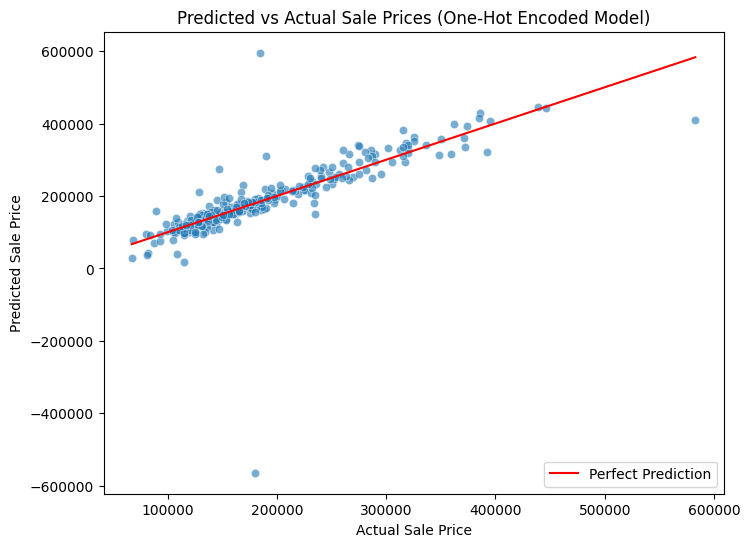

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted for One-Hot Encoded Model
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_enc, y=y_test_pred_enc, alpha=0.6)
sns.lineplot(x=y_test_enc, y=y_test_enc, color='red', label='Perfect Prediction')

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Predicted vs Actual Sale Prices (One-Hot Encoded Model)")
plt.legend()
plt.show()
